<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

# Final Project KASDD
## Kelompok Kasded Sukses Sejahtera
Anggota:

Adrian Ardizza - 2006524896 - KASDD D

Fransisco William Sudianto - 2006596535 - KASDD D

M Abdurahman Basyah - 2006597241 - KASDD A

Muhammad Fadhlan - 1806205060 - KASDD F


In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from numpy import where
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pointbiserialr, kurtosis

## Section 1: Exploratory Data Analysis

### Initial Dataset Loading

In [117]:
kos = pd.read_csv('rumah_kos.csv')
kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,9459.00,15769.00,7131.00,35.00,700000.00,4.00,4,campur
1,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,9740.00,409.00,10582.00,9.00,2000000.00,6.00,3,campur
2,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1095.00,9261.00,2053.00,12.00,545000.00,1.00,14,putri
3,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,3955.00,7319.00,3675.00,9.00,500000.00,5.00,62,putri
4,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,6672.00,15763.00,7996.00,9.00,1500000.00,20.00,22,putri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,3737.00,13349.00,5021.00,9.00,700000.00,5.00,16,putri
3289,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,2625.00,9410.00,1507.00,12.00,300000.00,26.00,104,putri
3290,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,7350.00,NaN,8176.00,9.00,675000.00,7.00,3,putra
3291,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,4745.00,14483.00,3764.00,12.00,600000.00,16.00,79,putra


### Dataset Characteristics

#### Shape

In [118]:
kos.shape

(3293, 16)

The given dataset has dimensions of 3293 rows and 16 columns. In this dataset, 7 features are numerical features, 1 feature (gender) is a categorical feature, and the 8 remaining features are binary features with possible values of 0 or 1.

### Information

In [119]:
kos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fasilitas_1           3230 non-null   float64
 1   fasilitas_2           3219 non-null   float64
 2   fasilitas_3           3231 non-null   float64
 3   fasilitas_4           3222 non-null   float64
 4   fasilitas_5           3221 non-null   float64
 5   fasilitas_6           3229 non-null   float64
 6   fasilitas_7           3215 non-null   float64
 7   fasilitas_8           3225 non-null   float64
 8   jarak_poi_1           3226 non-null   float64
 9   jarak_poi_2           3226 non-null   float64
 10  jarak_poi_3           3207 non-null   float64
 11  luas_kamar            3225 non-null   float64
 12  harga_bulanan         3208 non-null   float64
 13  banyak_kamar          3223 non-null   float64
 14  banyak_pencarian_kos  3293 non-null   int64  
 15  gender               

In [120]:
kos.drop([f"fasilitas_{i}" for i in range(1, 9)], axis=1).describe().T[["mean", "50%"]]

,mean,50%
jarak_poi_1,4679.48,3961.00
jarak_poi_2,9920.52,9241.00
jarak_poi_3,4906.22,3927.00
luas_kamar,12.14,12.00
harga_bulanan,897502.91,650000.00
banyak_kamar,10.51,8.00
banyak_pencarian_kos,35.36,20.00


In [121]:
modes = kos[[f"fasilitas_{i}" for i in range(1, 9)] + ["gender"]].mode()
modes.index = ["mode"]
modes.T

,mode
fasilitas_1,0.00
fasilitas_2,1.00
fasilitas_3,0.00
fasilitas_4,1.00
fasilitas_5,1.00
fasilitas_6,0.00
fasilitas_7,0.00
fasilitas_8,1.00
gender,putri


### Correlations

#### Numerical Feature Correlation

<AxesSubplot: >

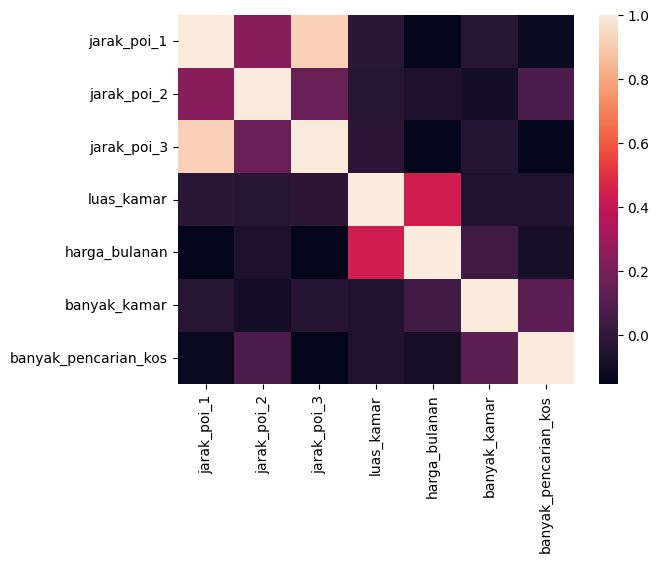

In [122]:
sns.heatmap(kos[["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "harga_bulanan", "banyak_kamar", "banyak_pencarian_kos"]].corr())

#### Correlation of Facilities to Monthly Price
We use the point biserial method of correlation here to handle finding the correlation between discrete and numerical features.

In [123]:
categorical = kos.drop(["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "banyak_kamar", "banyak_pencarian_kos", "harga_bulanan", "gender"], axis=1)
categorical

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00
2,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00
4,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...
3288,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3289,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00
3290,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
3291,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


<AxesSubplot: >

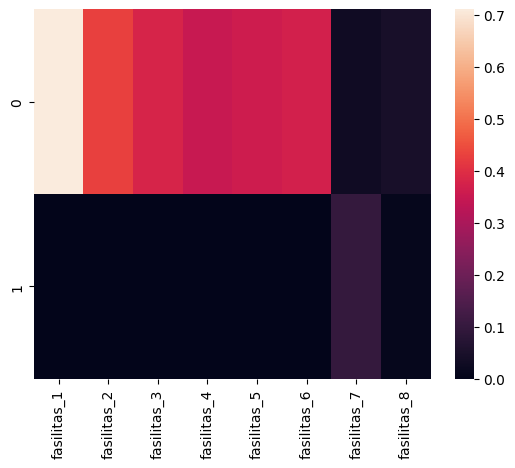

In [124]:
from scipy.stats import pointbiserialr

sns.heatmap(categorical.corrwith(kos['harga_bulanan'].astype('float'), method=pointbiserialr))

#### Pairplot of Dataset Features

#### Numerical Features

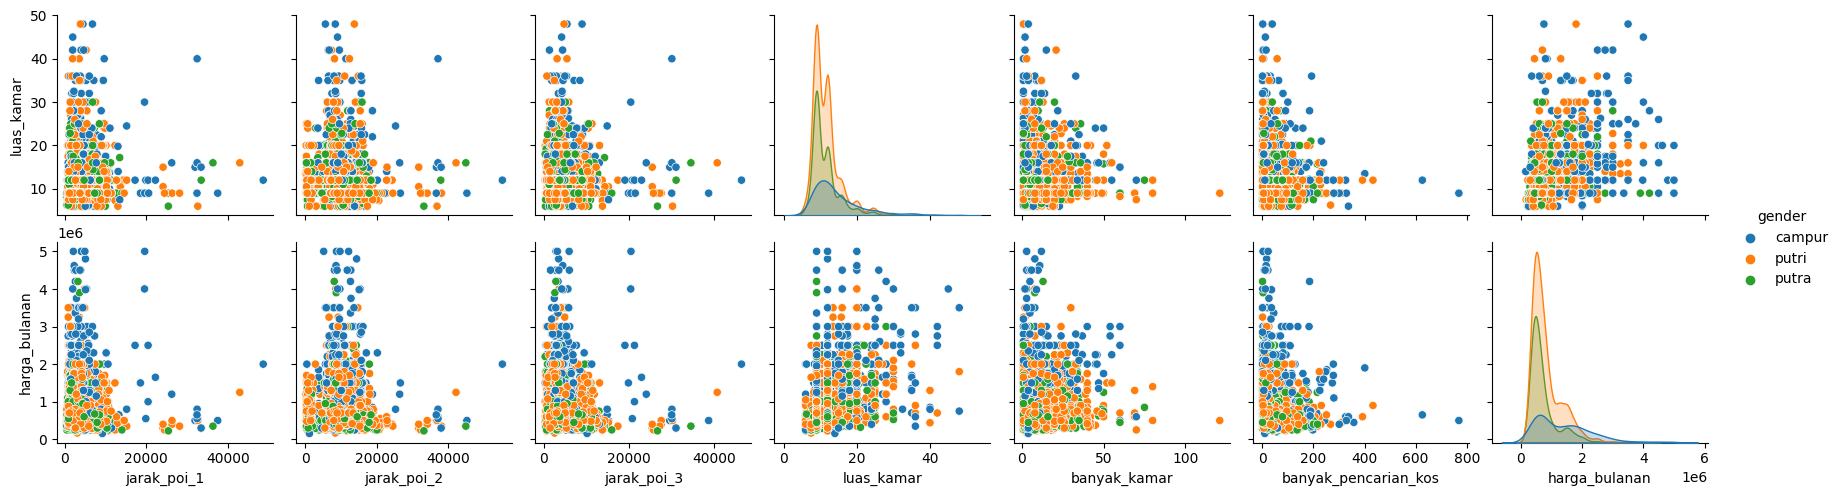

In [125]:
sns.pairplot(data=kos[["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "banyak_kamar", "banyak_pencarian_kos", "harga_bulanan", "gender"]], y_vars=["luas_kamar", "harga_bulanan"], hue="gender")

#### Exploration

##### 1A. Facilities with Monthly Price

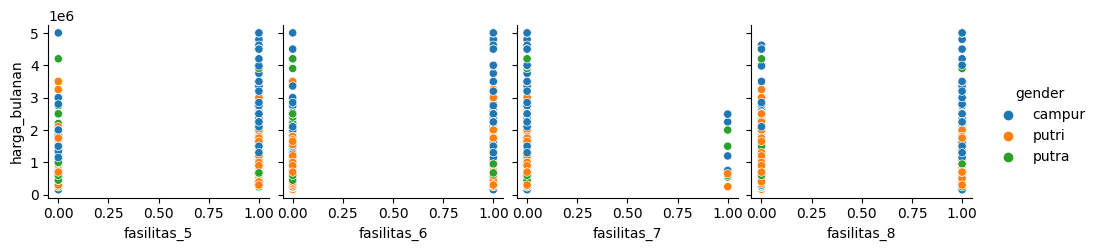

In [126]:
sns.pairplot(data=kos, y_vars=['harga_bulanan'], x_vars=[f'fasilitas_{i}' for i in range(5, 9)], hue='gender')

Secara individu, sebuah fasilitas tidak begitu berpengaruh terhadap pola harga bulanan karena pada sebagian besar kosan, terdapat lebih dari 1 fasilitas yang berkontribusi terhadap harganya. Sehingga pada tahap selanjutnya kita harus mempelajari hubungan antara keberadaan **beberapa** fasilitas pada suatu kos terhadap harga sewa-nya.

#### 1B. Correlation between Sets of Facilities to Gender

##### Kos Putri

In [127]:
female_kos = kos[kos["gender"] == "putri"].dropna()
female_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
2,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1095.00,9261.00,2053.00,12.00,545000.00,1.00,14,putri
3,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,3955.00,7319.00,3675.00,9.00,500000.00,5.00,62,putri
4,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,6672.00,15763.00,7996.00,9.00,1500000.00,20.00,22,putri
6,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,14043.00,23969.00,13225.00,12.00,400000.00,1.00,17,putri
9,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,4796.00,12331.00,2467.00,13.50,1300000.00,5.00,41,putri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,8840.00,18825.00,8225.00,7.50,400000.00,8.00,32,putri
3287,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,5430.00,15345.00,4755.00,25.00,900000.00,8.00,3,putri
3288,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,3737.00,13349.00,5021.00,9.00,700000.00,5.00,16,putri
3289,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,2625.00,9410.00,1507.00,12.00,300000.00,26.00,104,putri


In [128]:
female_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00


Apabila kita melakukan filter terhadap semua kos putri yang ada pada dataset, maka terlihat bahwa sebagian besar kos putri memiliki fasilitas_2 sampai dengan fasilitas_5 terpenuhi berdasarkan modus dari setiap fasilitas yang ada. Untuk mendapatkan gambaran yang lebih lengkap mengenai hal tersebut, maka kita dapat menghitung persentase kos yang memiliki fitur-fitur tersebut.

In [129]:
count = {}
for i in range(1, 9):
    percent = (len(female_kos[female_kos[f"fasilitas_{i}"]== 1]) / len(female_kos)) * 100
    count[f"fasilitas_{i}"] = f"{percent:.2f}%"

fasilitas_putri = pd.DataFrame(count, index=["Kos Putri"])
fasilitas_putri

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
Kos Putri,25.39%,62.34%,50.62%,64.14%,70.70%,39.61%,0.31%,47.34%


Berdasarkan perhitungan yang telah dilakukan diatas, terlihat bahwa fasilitas 2, 3, 4, 5 muncul di setidaknya 60% dari kos putri yang ada, fasilitas 8 pada 47% dari semua kos putri, fasilitas 6 pada 36% dari seluruh kos putri, fasilitas 1 ada pada 25% dari kos putri, dan fasilitas 7 tidak ada di hampir semua kos putri.

##### Kos Putra

In [130]:
male_kos = kos[kos["gender"] == "putra"].dropna()
male_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
8,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,3821.00,8979.00,2539.00,9.00,850000.00,20.00,18,putra
12,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1694.00,8378.00,3365.00,12.00,700000.00,12.00,34,putra
30,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,2780.00,8159.00,4874.00,9.00,1000000.00,3.00,18,putra
33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4210.00,9901.00,2390.00,9.00,500000.00,9.00,5,putra
41,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,749.00,9676.00,1883.00,9.00,500000.00,10.00,6,putra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2176.00,8682.00,4353.00,9.00,400000.00,5.00,46,putra
3249,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6826.00,15092.00,4751.00,16.00,450000.00,4.00,4,putra
3263,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,914.00,10963.00,2330.00,12.00,550000.00,8.00,30,putra
3278,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,4449.00,5599.00,5464.00,18.00,950000.00,1.00,5,putra


In [131]:
male_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


Berbeda dengan kos putri, pada umumnya kos putra hanya memiliki fasilitas 5, dan 8, dengan sebagian besar fasilitas yang lain-nya tidak ada pada sebagian besar kos putra. Persentase keberadaan fasilitas pada kos putra dapat dilihat sebagai berikut:

In [132]:
count = {}
for i in range(1, 9):
    percent = (len(male_kos[male_kos[f"fasilitas_{i}"]== 1]) / len(male_kos)) * 100
    count[f"fasilitas_{i}"] = f"{percent:.2f}%"

fasilitas_putra = pd.DataFrame(count, index=["Kos Putra"])
fasilitas_putra

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
Kos Putra,15.06%,48.49%,38.88%,43.04%,51.65%,33.72%,0.72%,57.10%


Berdasarkan perhitungan diatas, terlihat bahwa sebagian besar kos pria memiliki fasilitas_5 dan fasilitas_8, dengan beberapa fasilitas lain seperti fasilitas_2 dan fasilitas_4 dimiliki oleh setidaknya 42% dari kos pria. Lalu setidaknya 33% kos pria memiliki fasilitas_3 dan fasilitas_6.

Menariknya, sama seperti pada kos putri, jumlah kos putra yang memiliki fasilitas_7 sangat sedikit (hanya 0.63%). Hal ini menunjukkan bahwa keberdaan fasilitas_7 tidak begitu dipengaruhi oleh tipe gender dari kosan

##### Kos Putra

In [133]:
mixed_kos = kos[kos["gender"] == "campur"].dropna()
mixed_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,9459.00,15769.00,7131.00,35.00,700000.00,4.00,4,campur
1,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,9740.00,409.00,10582.00,9.00,2000000.00,6.00,3,campur
5,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,5651.00,10730.00,3598.00,12.00,1500000.00,6.00,9,campur
22,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,2063.00,9207.00,1626.00,12.00,600000.00,4.00,29,campur
25,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,9640.00,900.00,10253.00,9.00,750000.00,10.00,25,campur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,4543.00,9367.00,6863.00,9.00,2250000.00,12.00,42,campur
3256,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1489.00,8566.00,3146.00,12.00,1600000.00,34.00,34,campur
3266,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,6259.00,10288.00,4367.00,12.00,700000.00,11.00,10,campur
3272,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,7732.00,9083.00,6247.00,16.00,1150000.00,2.00,19,campur


In [134]:
mixed_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00


Pada umumnya kos campur pada dataset memiliki fasilitas_2, fasilitas_4, fasilitas_5, fasilitas_6, dan fasilitas_8. Hal ini sepertinya merupakan sebuah overlap antara fasilitas-fasilitas yang paling sering muncul pada kos putra dengan yang paling sering muncul di kos putri.

In [135]:
count = {}
for i in range(1, 9):
    percent = (len(mixed_kos[mixed_kos[f"fasilitas_{i}"]== 1]) / len(mixed_kos)) * 100
    count[f"fasilitas_{i}"] = f"{percent:.2f}%"

fasilitas_mixed = pd.DataFrame(count, index=["Kos Campuran"])
fasilitas_mixed

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
Kos Campuran,44.92%,75.62%,44.70%,55.30%,68.62%,62.75%,0.90%,55.30%


In [136]:
pd.concat([fasilitas_putra, fasilitas_putri, fasilitas_mixed]).T

,Kos Putra,Kos Putri,Kos Campuran
fasilitas_1,15.06%,25.39%,44.92%
fasilitas_2,48.49%,62.34%,75.62%
fasilitas_3,38.88%,50.62%,44.70%
fasilitas_4,43.04%,64.14%,55.30%
fasilitas_5,51.65%,70.70%,68.62%
fasilitas_6,33.72%,39.61%,62.75%
fasilitas_7,0.72%,0.31%,0.90%
fasilitas_8,57.10%,47.34%,55.30%


## Data Pre-Processing

### Null Data

#### Percentage of NULL

In [137]:
kos.isna().sum().divide(len(kos))

fasilitas_1            0.02
fasilitas_2            0.02
fasilitas_3            0.02
fasilitas_4            0.02
fasilitas_5            0.02
fasilitas_6            0.02
fasilitas_7            0.02
fasilitas_8            0.02
jarak_poi_1            0.02
jarak_poi_2            0.02
jarak_poi_3            0.03
luas_kamar             0.02
harga_bulanan          0.03
banyak_kamar           0.02
banyak_pencarian_kos   0.00
gender                 0.00
dtype: float64

#### Filling NaN Attributes

We fill NaN atrributes in each column with the Mode (for categorical data) or the mean/median (for numerical data) depending on the results of the builtin `DataFrame.describe()` function.

In [138]:
kos.describe().T[['mean', '50%']].T

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos
mean,0.26,0.61,0.46,0.56,0.64,0.43,0.00,0.52,4679.48,9920.52,4906.22,12.14,897502.91,10.51,35.36
50%,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,3961.00,9241.00,3927.00,12.00,650000.00,8.00,20.00


In [139]:
for i in range(1, 9):
    kos[f'fasilitas_{i}'] = kos[f'fasilitas_{i}'].fillna(kos[f'fasilitas_{i}'].mode)
for i in range(1, 4):
    kos[f'jarak_poi_{i}'] = kos[f'jarak_poi_{i}'].fillna(kos[f'jarak_poi_{i}'].median())

kos['luas_kamar'] = kos['luas_kamar'].fillna(kos['luas_kamar'].mean())
kos['harga_bulanan'] = kos['harga_bulanan'].fillna(kos['harga_bulanan'].mean())
kos['banyak_kamar'] = kos['banyak_kamar'].fillna(kos['banyak_kamar'].median())
kos['banyak_pencarian_kos'] = kos['banyak_pencarian_kos'].fillna(kos['banyak_pencarian_kos'].median())

### Scaling Data

We create a new DataFrame with scaled numerical data for models that are prone to outliers

In [140]:
from sklearn.preprocessing import StandardScaler

numerical = [f'jarak_poi_{i}' for i in range(1, 4)] + ['luas_kamar', 'harga_bulanan', 
'banyak_kamar', 'banyak_pencarian_kos']

scaler = StandardScaler()
scaler.fit(kos[numerical])

numerical_kos_transformed = scaler.transform(kos[numerical])

kos_transformed = kos.copy()
kos_transformed[numerical] = numerical_kos_transformed
kos_transformed


,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.36,1.26,0.63,4.66,-0.31,-0.68,-0.66,campur
1,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,1.44,-2.04,1.60,-0.64,1.72,-0.47,-0.68,campur
2,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.01,-0.14,-0.79,-0.03,-0.55,-1.00,-0.45,putri
3,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,-0.20,-0.55,-0.34,-0.64,-0.62,-0.58,0.56,putri
4,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.57,1.25,0.87,-0.64,0.94,1.01,-0.28,putri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,-0.26,0.74,0.04,-0.64,-0.31,-0.58,-0.41,putri
3289,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,-0.58,-0.11,-0.94,-0.03,-0.93,1.64,1.45,putri
3290,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.76,-0.14,0.92,-0.64,-0.35,-0.36,-0.68,putra
3291,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.02,0.98,-0.31,-0.03,-0.46,0.59,0.92,putra


## Section 2: Modeling

### 2A. Gender Classifier

In this section, we will explore the process of creating a classifier model that can determine the type of a given kos that is not in the training dataset. Based on gender, a Kos can be divided into three types, that is: Male (Laki-Laki), Female (Perempuan), and Mixed (Campuran). Given the characteristics of each kos that is given in the dataset, we seek to create a model that can more accurately classify whether a given kos is male or female based on the available data that is given.

#### Checking for Class Imbalance

In [141]:
from collections import Counter

y = kos["gender"]
Counter(y)

Counter({'campur': 610, 'putri': 1729, 'putra': 954})

As we can see, in the given dataset there are significantly more Female kos than both Mixed and Male kos kombined, hence we will have to rectify for this by using either oversampling/undersampling.

#### Improving Class Balance by using ADASYN

Based on the explorations that we have done in the previous section of this assignment, we concluded that there are many similarities and overlaps between the minority and majority class, hence we feel that ADASYN might be well suited for this case.

ADASYN in most cases have the following Pros and Cons:
- Pros:
    - Reduction of bias introduced by class imbalance.
    - Adaptive shift of the classification decision boundary towards the observations that are *"hard to learn"*.
    - Automatic decision regarding the number of synthetic samples that need to be generated for each minority data example using a density distribution as a criterion.
- Cons:
    - Risk of having only 1 minority example for observation belonging to the minority class that are sparsely distributed.
    - Due to ADASYN adaptability nature that allows us to generate more data in neighbourhoods with high amounts of majority class examples, the synthetic data generated might be very similar to the majority data class, potentially generating false positives.

Source: https://medium.com/quantyca/oversampling-and-undersampling-adasyn-vs-enn-60828a58db39

We feel that given the pros of using ADASYN, that being the reduction of bias towards the female kos type due to class imbalance, it was worth using this method of oversampling to solve the underlying issue of too many female kos.

In [165]:
from imblearn.over_sampling import ADASYN

X = kos_transformed.drop("gender", axis=1).copy()
X[[f"fasilitas_{i}" for i in range(1, 9)]] = X[[f"fasilitas_{i}" for i in range(1, 9)]].astype("bool")
y = kos_transformed["gender"].copy()

ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)
pd.concat([X_resampled, y_resampled], axis=1)
Counter(y_resampled)

Counter({'campur': 1809, 'putri': 1729, 'putra': 1777})

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

rf_nosample = RandomForestClassifier(random_state=32)
rf = RandomForestClassifier(random_state=32)

accuracy_with_resample = np.mean(cross_val_score(rf, X_resampled, y_resampled, cv=StratifiedKFold(n_splits=5)))
accuracy_nosample = np.mean(cross_val_score(rf_nosample, X, y, cv=StratifiedKFold(n_splits=5)))
print(f"Average Accuracy Score w/o Resample: {accuracy_nosample}")
print(f"Average Accuracy Score w/ Resample: {accuracy_with_resample}")

Average Accuracy Score w/o Resample: 0.6358976251204966
Average Accuracy Score w/ Resample: 0.7883349012229539


As we can see from the results above, after implementing ADASYN resampling, we achieved a very high increase in accuracy across 5 cross-validation folds. Based on these results and our familiarity with the RandomForest model, we decided to implement base our classifier off the Random Forest method with the data from ADASYN resampling used as the training and testing set. 

#### Hyperparameter Tuning

In order to increase the accuracy of our base model, we then begin the process of hyperparameter tuning in order to determine the best set of hyperparameters to use for training our model. In order to do so we will be making use of the experimantal RandomizedSearch cross-validation model provided by `sklearn` to increase our speed in determining hyperparameters when compared to standard GridSearchCV.

In [167]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

rf = RandomForestClassifier(random_state=32)

hgs = RandomizedSearchCV(rf, param_grid, n_jobs=6, cv=StratifiedKFold(), verbose=10)
hgs.fit(X_resampled, y_resampled)
hgs.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=10, n_estimators=1600............................
[CV 4/5; 1/10] START max_depth=10, n_estimators=1600............................
[CV 1/5; 2/10] START max_depth=60, n_estimators=1400............................
[CV 2/5; 1/10] START max_depth=10, n_estimators=1600............................
[CV 3/5; 1/10] START max_depth=10, n_estimators=1600............................[CV 5/5; 1/10] START max_depth=10, n_estimators=1600............................

[CV 5/5; 1/10] END max_depth=10, n_estimators=1600;, score=0.748 total time=   8.1s
[CV 2/5; 2/10] START max_depth=60, n_estimators=1400............................
[CV 3/5; 1/10] END max_depth=10, n_estimators=1600;, score=0.698 total time=   8.4s
[CV 3/5; 2/10] START max_depth=60, n_estimators=1400............................
[CV 4/5; 1/10] END max_depth=10, n_estimators=1600;, score=0.705 total time=   8.5s
[CV 4/5; 2/10] START max_depth=60, n_es

RandomForestClassifier(max_depth=30, n_estimators=2000, random_state=32)

In [168]:
best_rf = RandomForestClassifier(max_depth=30, n_estimators=2000, random_state=32)

accuracy_with_resample = np.mean(cross_val_score(best_rf, X_resampled, y_resampled, cv=StratifiedKFold(n_splits=5)))
print(f"Average Accuracy Score w/ Resample: {accuracy_with_resample}")

Average Accuracy Score w/ Resample: 0.7988711194731891


As we can see, after hyperparameter tuning we are getting marginally better results, with the Random Forest model being able to predict the type of Kos correctly 79% of the time on average across 5 folds.

#### Analysis

In [170]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25)


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Results of evaluation based on classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

rf = RandomForestClassifier(max_depth=30, n_estimators=2000, random_state=32)
rf.fit(X_train, y_train)

evaluate_classifier_performance(rf.predict(X_test), y_test)

Results of evaluation based on classification report 

              precision    recall  f1-score   support

      campur       0.83      0.91      0.87       441
       putra       0.75      0.77      0.76       452
       putri       0.75      0.65      0.70       436

    accuracy                           0.78      1329
   macro avg       0.78      0.78      0.77      1329
weighted avg       0.78      0.78      0.77      1329



Confusion Matrix



prediction,campur,putra,putri
actual,,,
campur,401,16,24
putra,31,349,72
putri,53,99,284




F1 Macro Average: 0.7747259592466612
F1 Micro Average: 0.7780285929270128
Precision Macro Average: 0.7754425723925883
Precision Micro Average: 0.7780285929270128
Recall Macro Average: 0.7775990309161651
Recall Micro Average: 0.7780285929270128



Using the above function to test for a 1/4 fold of the data, we can see that the reason for the mediocre accuracy of the model is the high amount of false positives. We think that this is due to the ADASYN oversampling method that we have used, where there is a high chance of overlaps between the minority and majority class after resampling. To test this, we can try and perform dimensionality reduction on the dataset to identify any overlapping clusters that might be found.

Because a majority of the features available on this dataset are binary categorical datasets, then PCA will not be able to capture the variance contributed by the categorical features. Hence we are using a novel approach for dimensionality reduction called CorEx (Correlation Explanation) that is described in the paper "Fast structure learning with modular regularization" by Steeg, G. V. and colleagues.

We will be using the implementation created by the original paper writer that is available on: https://github.com/gregversteeg/LinearCorex

Reference:
Steeg, G. V., Harutyunyan, H., Moyer, D., & Galstyan, A. (2017). *Fast structure learning with modular regularization.*

,F1,F2,gender
0,1.25,-0.33,campur
1,1.46,0.62,campur
2,-0.97,-0.70,putri
3,-0.24,-0.44,putri
4,0.65,1.26,putri
...,...,...,...
5310,-0.06,1.14,putra
5311,1.01,-0.35,putra
5312,0.78,-1.17,putra
5313,0.35,-0.39,putra


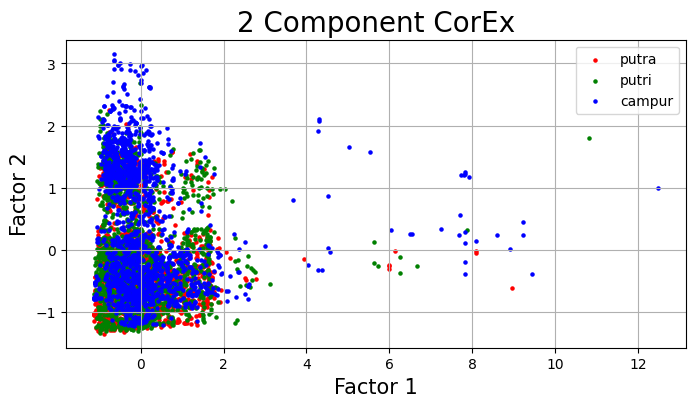

In [175]:
import linearcorex as lc

cor = lc.Corex(n_hidden=2)
cor = cor.fit_transform(X_resampled.to_numpy())

pc_df = pd.DataFrame(data=cor, columns=['F1', 'F2'])
pc_df = pd.concat([pc_df, y_resampled], axis=1)
display(pc_df)

fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Factor 1', fontsize = 15)
ax.set_ylabel('Factor 2', fontsize = 15)
ax.set_title('2 Component CorEx', fontsize = 20)
targets = ["putra", "putri", "campur"]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pc_df['gender'] == target
    ax.scatter(pc_df.loc[indicesToKeep, 'F1']
               , pc_df.loc[indicesToKeep, 'F2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

The results of the above dimensionality reduction confirm our suspicions that the dataset given for this assignment have significant overlapping between their classes. This would make it hard for us to create a model that is over 80% accurate for the given dataset because it will be hard for a model to distinguish between the features unique to a singular class.

For example, if we try to classify a dataset, it might have trouble distinguishing between it being male or mixed because of the significant overlap along those 2 classes.

On the question of whether or not this overlapping has existed within the data before using ADASYN, we also tried using dimensionality reduction on the original dataset and acquired the following results:

,F1,F2,gender
0,1.15,0.25,campur
1,1.47,-0.72,campur
2,-0.93,0.64,putri
3,-0.27,0.42,putri
4,0.68,-1.33,putri
...,...,...,...
3288,-0.14,0.58,putri
3289,-0.70,0.26,putri
3290,0.83,0.29,putra
3291,-0.09,0.79,putra


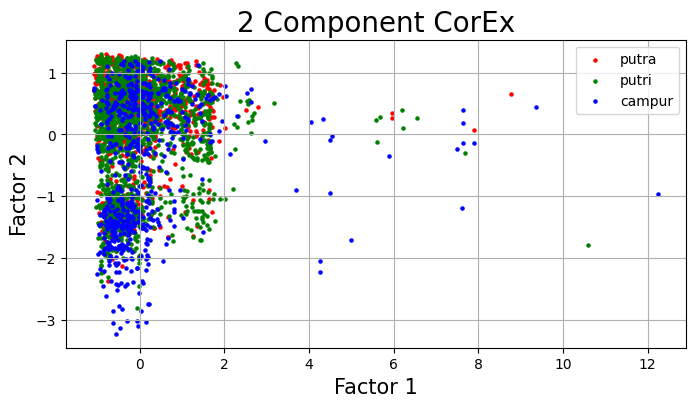

In [174]:
import linearcorex as lc

cor = lc.Corex(n_hidden=2)
cor = cor.fit_transform(X.to_numpy())

pc_df = pd.DataFrame(data=cor, columns=['F1', 'F2'])
pc_df = pd.concat([pc_df, y], axis=1)
display(pc_df)
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Factor 1', fontsize = 15)
ax.set_ylabel('Factor 2', fontsize = 15)
ax.set_title('2 Component CorEx', fontsize = 20)
targets = ["putra", "putri", "campur"]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pc_df['gender'] == target
    ax.scatter(pc_df.loc[indicesToKeep, 'F1']
               , pc_df.loc[indicesToKeep, 'F2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

The results of the above CorEx leads us to conclude that even before implementing ADASYN resampling, the given dataset already has a significant case of overlap between the classes, hence we believe the mediocre accuracy of the classification model even after hyperparameter tuning was not directly caused by ADASYN, but by the dataset itself due to significant overlapping.

### 2B. Kos Price Regression 

### 2C. Kos Clustering

In [230]:
X_clustering = X_resampled.copy()
y_clustering = y_resampled.copy()
X_clustering[[f"fasilitas_{i}" for i in range(1, 9)]] = X_clustering[[f"fasilitas_{i}" for i in range(1, 9)]].astype("category")

X_train, X_test, y_train, y_test = train_test_split(X_clustering, y_clustering, test_size=0.25)

#### Agglomerative Clustering

In [251]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
cluster = agg.fit(X_train)
label = cluster.fit_predict(X_test)

In [252]:
import linearcorex as lc

cor = lc.Corex(n_hidden=2)
cor = cor.fit_transform(X_test.to_numpy())

pc_df = pd.DataFrame(data=cor, columns=['F1', 'F2'])
label_df = pd.DataFrame(data=label, columns=['Label'])
pc_df = pd.concat([pc_df, label_df], axis=1)
display(pc_df)

,F1,F2,Label
0,-0.45,-0.72,0
1,0.03,-0.22,0
2,-0.59,-0.45,0
3,0.52,-0.72,0
4,-0.87,-0.67,0
...,...,...,...
1324,-0.32,0.68,0
1325,0.47,-0.80,0
1326,0.66,-0.69,0
1327,1.31,0.26,0


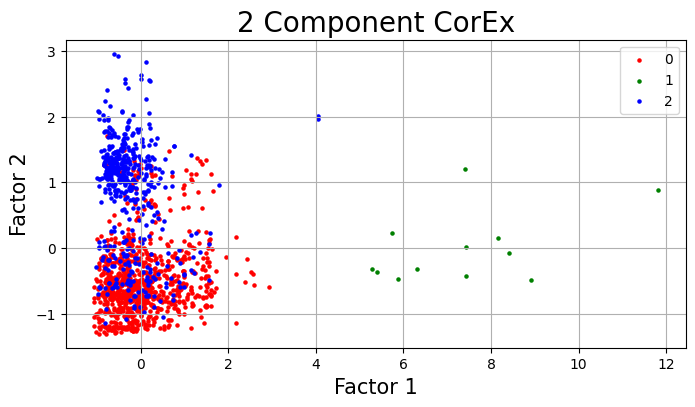

In [253]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Factor 1', fontsize = 15)
ax.set_ylabel('Factor 2', fontsize = 15)
ax.set_title('2 Component CorEx', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pc_df["Label"] == target
    ax.scatter(pc_df.loc[indicesToKeep, 'F1']
               , pc_df.loc[indicesToKeep, 'F2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

Clustering using Agglomerative Clustering gives us 3 clusters, which we can visualize by doing dimensionality reduction as seen above.

#### Gaussian Mixture

In [235]:
from sklearn.mixture import GaussianMixture

In [239]:
gm = GaussianMixture(n_components=2).fit(X_train)
label = gm.predict(X_test)

In [240]:
import linearcorex as lc

cor = lc.Corex(n_hidden=2)
cor = cor.fit_transform(X_test.to_numpy())

pc_df = pd.DataFrame(data=cor, columns=['F1', 'F2'])
label_df = pd.DataFrame(data=label, columns=['Label'])
pc_df = pd.concat([pc_df, label_df], axis=1)
display(pc_df)

,F1,F2,Label
0,-0.45,0.72,0
1,0.03,0.22,0
2,-0.59,0.45,0
3,0.52,0.72,0
4,-0.87,0.67,0
...,...,...,...
1324,-0.32,-0.68,1
1325,0.47,0.80,0
1326,0.66,0.69,0
1327,1.31,-0.26,0


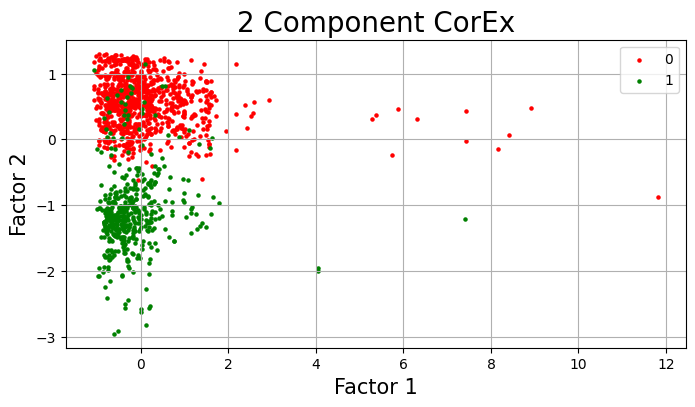

In [242]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Factor 1', fontsize = 15)
ax.set_ylabel('Factor 2', fontsize = 15)
ax.set_title('2 Component CorEx', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pc_df["Label"] == target
    ax.scatter(pc_df.loc[indicesToKeep, 'F1']
               , pc_df.loc[indicesToKeep, 'F2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()